# Training
In this notebook I train some models

### Import Things

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [2]:
df = pd.read_csv('./training2.csv')
df.head()

,subreddit,title,is_world_news,title_len,title_wordcount
0,worldnews,xiaomi corporation has sued the united states ...,1,94,16
1,worldnews,joe bidens administration doesnt trust boris j...,1,81,13
2,worldnews,to discredit navalny protesters russia spreads...,1,79,11
3,worldnews,ethiopia moves artillery to sudanese border af...,1,64,9
4,worldnews,putins former judo partner says he owns palace...,1,87,14


### Make training and testing sets

In [3]:
X = df['title']
y = df['is_world_news']

#check if classes are balanced
#The class that has a higher percentage is also the baseline.
y.value_counts(normalize=True)

0    0.505957
1    0.494043
Name: is_world_news, dtype: float64

In [42]:
%%time
y.value_counts(normalize=True)

Wall time: 998 µs


0    0.505957
1    0.494043
Name: is_world_news, dtype: float64

The baseline accuracy is 50.59%. If I were to just guess every single post was from the world news subreddit, I would be 50.59% correct.

In [4]:
#stratifying because the classes are slightly not balanced
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [5]:
cv = TfidfVectorizer(stop_words='english')
X_train_cv = pd.DataFrame(cv.fit_transform(X_train).todense(), columns=cv.get_feature_names())
X_test_cv = pd.DataFrame(cv.transform(X_test).todense(), columns=cv.get_feature_names())

In [6]:
X_train_cv.head()

,000,0015,004,007,007s,008,01,012021,01232021,02,...,zosta,zu,zuckerberg,zulfikar,zulu,zum,zurer,zusammenstellen,zwikszy,zymo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
X_test_cv.head()

,000,0015,004,007,007s,008,01,012021,01232021,02,...,zosta,zu,zuckerberg,zulfikar,zulu,zum,zurer,zusammenstellen,zwikszy,zymo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Time to train! (:

#### LogisticRegression

In [8]:
logreg = LogisticRegression()

In [9]:
%%time
logreg.fit(X_train_cv, y_train)

Wall time: 18 s


LogisticRegression()

In [10]:
print(f'LOGISTIC REGRESSION \n-------\nThe training accuracy is: {logreg.score(X_train_cv, y_train)}\nThe testing accuracy is: {logreg.score(X_test_cv, y_test)}')

LOGISTIC REGRESSION 
-------
The training accuracy is: 0.9571810239006426
The testing accuracy is: 0.901667749620966


#### Plot confusion matrix for Logistic Regression:

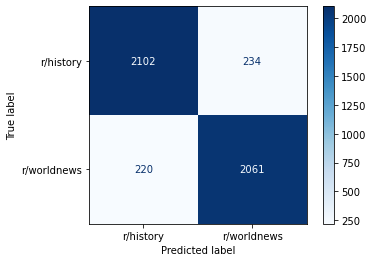

In [11]:
metrics.plot_confusion_matrix(logreg, X_test_cv, y_test, cmap='Blues', values_format='d', display_labels=['r/history', 'r/worldnews']);

### Random Forest

In [12]:
rf = RandomForestClassifier(n_jobs=-1) #n_jobs =-1 to make it faster

In [13]:
%%time
rf.fit(X_train_cv, y_train)

Wall time: 3min 16s


RandomForestClassifier(n_jobs=-1)

In [14]:
print(f'RANDOM FOREST \n-------\nThe training accuracy is: {rf.score(X_train_cv, y_train)}\nThe testing accuracy is: {rf.score(X_test_cv, y_test)}')

RANDOM FOREST 
-------
The training accuracy is: 0.9994945483428407
The testing accuracy is: 0.8745938921377517


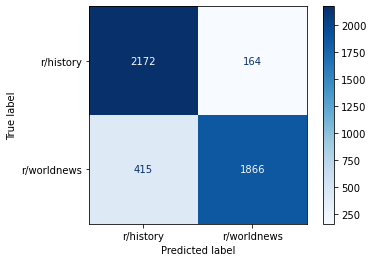

In [15]:
metrics.plot_confusion_matrix(rf, X_test_cv, y_test, cmap='Blues', values_format='d', display_labels=['r/history', 'r/worldnews']);

In [16]:
%%time

# gridsearching for best hyperparameters because the 
# default RandomForestClassifier did worse than my LogisticRegression:
# params were edited because I ran out of memory
params = {
    'n_estimators': [75, 100],
    'max_depth':[None, 3, 4],
    'max_features': ['auto', 4]
}

grid = GridSearchCV(rf, param_grid = params)
grid_rf = grid.fit(X_train_cv, y_train)

Wall time: 33min 11s


In [25]:
print(f'GRID SEARCH RANDOM FOREST \n-------\nThe training accuracy is: {grid_rf.score(X_train_cv, y_train)}\nThe testing accuracy is: {grid_rf.score(X_test_cv, y_test)}')

GRID SEARCH RANDOM FOREST 
-------
The training accuracy is: 0.9994945483428407
The testing accuracy is: 0.9027507039202946


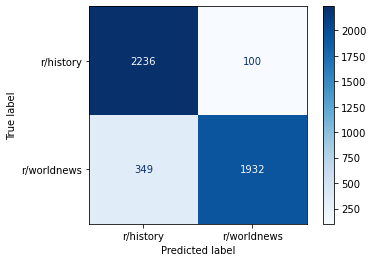

In [18]:
metrics.plot_confusion_matrix(grid_rf, X_test_cv, y_test, cmap='Blues', values_format='d', display_labels=['r/history', 'r/worldnews']);

### Decision Tree

In [19]:
tree = DecisionTreeClassifier()

In [20]:
%%time
tree.fit(X_train_cv, y_train)

Wall time: 20min 33s


DecisionTreeClassifier()

In [21]:
print(f'DECISION TREE \n-------\nThe training accuracy is: {tree.score(X_train_cv, y_train)}\nThe testing accuracy is: {tree.score(X_test_cv, y_test)}')

DECISION TREE 
-------
The training accuracy is: 0.9994945483428407
The testing accuracy is: 0.8405891271388347


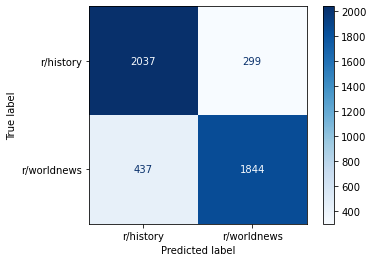

In [22]:
metrics.plot_confusion_matrix(tree, X_test_cv, y_test, cmap='Blues', values_format='d', display_labels=['r/history', 'r/worldnews']);

### Gradient Boost

In [23]:
%%time

gboost = GradientBoostingClassifier()
gboost.fit(X_train_cv, y_train)

Wall time: 1h 5min 48s


GradientBoostingClassifier()

In [24]:
print(f'Gradient Boost \n-------\nThe training accuracy is: {gboost.score(X_train_cv, y_train)}\nThe testing accuracy is: {gboost.score(X_test_cv, y_test)}')

Gradient Boost 
-------
The training accuracy is: 0.7687919705393891
The testing accuracy is: 0.754169374052415


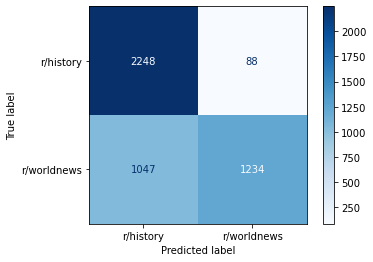

In [45]:
metrics.plot_confusion_matrix(gboost, X_test_cv, y_test, cmap='Blues', values_format='d', display_labels=['r/history', 'r/worldnews']);

### Summary

In [36]:
summary = pd.DataFrame()

In [37]:
summary['models'] = ['baseline', 'logistic regression', 'random forest', 'random forest (grid search)', 'decision tree', 'gradient boost']

In [38]:
summary['training accuracy'] = [y.value_counts(normalize=True)[0], logreg.score(X_train_cv, y_train), rf.score(X_train_cv, y_train), grid_rf.score(X_train_cv, y_train), tree.score(X_train_cv, y_train), gboost.score(X_train_cv, y_train)]

In [40]:
summary['testing accuracy'] = [y.value_counts(normalize=True)[0], logreg.score(X_test_cv, y_test), rf.score(X_test_cv, y_test), grid_rf.score(X_test_cv, y_test), tree.score(X_test_cv, y_test), gboost.score(X_test_cv, y_test)]

In [43]:
summary['time'] = ['998 µs', '18 s', '3min 16s', '33min 11s', '20min 33s', '1h 5min 48s']

In [44]:
summary

,models,training accuracy,testing accuracy,time
0,baseline,0.505957,0.505957,998 µs
1,logistic regression,0.957181,0.901668,18 s
2,random forest,0.999495,0.874594,3min 16s
3,random forest (grid search),0.999495,0.902751,33min 11s
4,decision tree,0.999495,0.840589,20min 33s
5,gradient boost,0.768792,0.754169,1h 5min 48s


### Conclusions:
Logistic Regression did pretty well, if I didn't care about minimizing false positives, I would use Logistic Regression.
However, if I wanted to minimize false positives, I would use Random Forest.

To improve the model, I would get rid of spam posts.